# **YOLOV8 Gun Detetcion**



In [ ]:
# to check and monitoring of NVIDIA GPU devices.
!nvidia-smi

Sat Dec 30 08:20:41 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **2. YOLOV8 Installation:**
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.


In [ ]:
# installing package to work with yolov8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
!unzip /content/Pistols.v1-resize-416x416.yolov8.zip #UNZIPPING THE DATASET

In [ ]:
import numpy as np
import cv2

# Image path in Training
image_path_train = '/content/drive/gun/train/images/gun1.jpeg'
image_train = cv2.imread(image_path_train)

# Check if the image is loaded successfully
if image_train is not None:
    height_train, width_train, _ = image_train.shape
    print("Shape of the training image: {}, {}".format(height_train, width_train))
else:
    print("Error loading the training image:", image_path_train)

# Image path in Validation
image_path_valid = '/content/drive/gun/valid/images/gun1.jpeg'
image_valid = cv2.imread(image_path_valid)

# Check if the image is loaded successfully
if image_valid is not None:
    height_valid, width_valid, _ = image_valid.shape
    print("Shape of the validation image: {}, {}".format(height_valid, width_valid))
else:
    print("Error loading the validation image:", image_path_valid)


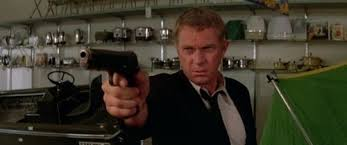

In [ ]:
# dispying with different width
from IPython.display import Image
Image(filename='/content/drive/gun/train/images/gun1.jpeg', width=300)

In [ ]:

# Creating GUN.yaml
%%writefile /content/datasets/gun_dataset2/gun.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/datasets/gun_dataset2/ # dataset root dir
train: images/ # train images (relative to 'path')
val: images/ # val images (relative to 'path')
test:  # test images (optional)

# number of classes
nc: 1

# class names
#names: ['1']
names: ['gun']  # class names


Writing /content/datasets/gun_dataset2/gun.yaml


### **5. Training Our Custom Gun Detetcion Model:**

We are using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:
*   specify the path to the data configuration file
*   specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
*   input image size
*   Size of a batch (model weights are updated with each batch).
*   No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/datasets/gun_dataset2/gun.yaml", epochs=25, imgsz=640)  # train the model

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/gun_dataset2/gun.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/datasets/gun_dataset2/labels.cache... 2971 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2971/2971 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/gun_dataset2/labels.cache... 2971 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2971/2971 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.23G      1.238      1.647       1.63         24        640: 100%|██████████| 186/186 [01:39<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.02it/s]


                   all       2971       3432      0.135      0.367     0.0814     0.0323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25       7.8G      1.439       1.79      1.811         22        640: 100%|██████████| 186/186 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.04it/s]


                   all       2971       3432      0.274      0.318      0.172     0.0556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      7.77G      1.375      1.695      1.757         25        640: 100%|██████████| 186/186 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.05it/s]

                   all       2971       3432      0.505      0.359       0.35      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      7.77G      1.313      1.634      1.699         40        640: 100%|██████████| 186/186 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.00it/s]


                   all       2971       3432      0.707      0.501      0.602      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.78G      1.215      1.479      1.612         33        640: 100%|██████████| 186/186 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.04it/s]


                   all       2971       3432      0.642      0.499      0.558       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       7.8G      1.136      1.355      1.564         32        640: 100%|██████████| 186/186 [01:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:47<00:00,  1.96it/s]


                   all       2971       3432      0.724      0.503      0.604      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       7.8G      1.096      1.304      1.531         27        640: 100%|██████████| 186/186 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.02it/s]

                   all       2971       3432      0.718       0.57      0.675      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.78G      1.081      1.257      1.511         27        640: 100%|██████████| 186/186 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.791      0.603       0.71      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      7.78G      1.038      1.206      1.476         35        640: 100%|██████████| 186/186 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.00it/s]

                   all       2971       3432      0.793      0.507      0.651      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      7.78G      1.014      1.175      1.453         21        640: 100%|██████████| 186/186 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.04it/s]

                   all       2971       3432      0.773      0.614      0.722      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.79G      0.997      1.139      1.439         35        640: 100%|██████████| 186/186 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.01it/s]

                   all       2971       3432      0.794      0.638      0.754      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      7.79G     0.9653      1.084      1.414         30        640: 100%|██████████| 186/186 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.789      0.652      0.765      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      7.79G     0.9468      1.052      1.409         32        640: 100%|██████████| 186/186 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]

                   all       2971       3432      0.797      0.668      0.778      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      7.79G     0.9289      1.029       1.39         24        640: 100%|██████████| 186/186 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.02it/s]

                   all       2971       3432      0.812      0.673      0.795      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.78G     0.9217       1.01      1.383         31        640: 100%|██████████| 186/186 [01:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.02it/s]

                   all       2971       3432      0.825        0.7      0.808      0.615


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.79G     0.9045     0.9815      1.452         11        640: 100%|██████████| 186/186 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.832      0.714      0.818      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.79G     0.8788     0.9413      1.414         11        640: 100%|██████████| 186/186 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.823      0.703      0.818      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.81G     0.8491      0.888      1.388         11        640: 100%|██████████| 186/186 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  2.01it/s]

                   all       2971       3432      0.841      0.745      0.842      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       7.8G     0.8159     0.8476      1.354         19        640: 100%|██████████| 186/186 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:46<00:00,  1.99it/s]

                   all       2971       3432      0.853      0.747      0.853      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.79G     0.7736     0.8005      1.316         12        640: 100%|██████████| 186/186 [01:35<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.838      0.767      0.859       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.79G      0.758     0.7845      1.314         12        640: 100%|██████████| 186/186 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.882      0.779      0.885      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.79G     0.7418     0.7208      1.298         11        640: 100%|██████████| 186/186 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.06it/s]

                   all       2971       3432      0.885      0.793      0.891      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.78G      0.725     0.7003      1.267         14        640: 100%|██████████| 186/186 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.883      0.807      0.902      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      7.79G     0.7145     0.6813      1.261         12        640: 100%|██████████| 186/186 [01:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.02it/s]

                   all       2971       3432      0.884       0.82      0.909       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      7.79G     0.6984     0.6478      1.238         11        640: 100%|██████████| 186/186 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:45<00:00,  2.03it/s]

                   all       2971       3432      0.906       0.83      0.917      0.745



25 epochs completed in 1.039 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 52.0MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]


                   all       2971       3432      0.906       0.83      0.917      0.745
Speed: 0.2ms preprocess, 10.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train8


while training , I have observed some error. I think it is related to some plotting, so I have raised a issue yolov8 repo. Below is the link to track.
https://github.com/ultralytics/ultralytics/issues/337

### **Val:**

Validate trained YOLOv8n model accuracy on the validation dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/datasets/gun_dataset2/labels.cache... 2971 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2971/2971 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:24<00:00,  2.21it/s]


                   all       2971       3432      0.906       0.83      0.917      0.745
Speed: 0.3ms preprocess, 21.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train82


In [ ]:
# checking the latest trained files
!ls 'runs/detect/train2/weights'

best.pt  last.pt


In [ ]:
from ultralytics import YOLO
# loading the trianed model
model = YOLO("/content/best.pt")  # load a custom model with the best weights

In [ ]:
# Mount Google Drive
from google.colab import drive

# Click on the link generated, sign in to your Google account, and copy the authorization code.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# testing the model on a video
!yolo task=detect mode=predict model="/content/best.pt" source="/content/drive/MyDrive/content/video.mp4" --save_txt

In [ ]:
from google.colab import files

# Specify the file path
file_path = '/content/runs/detect/train8/weights/best.pt'

# Trigger the download
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **References:**

1.https://github.com/ultralytics/ultralytics

2.https://docs.ultralytics.com/tasks/detection/